# Grip : The Sparks Foundation Task - 3

## Author : Sarang Khetre

## Task 3 : Exploratory Data Analysis - Retail Sample Super Store 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('SampleSuperstore.csv')

In [3]:

df.shape


(9994, 13)

In [4]:
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.nunique()


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
df.drop('Country',axis=1,inplace=True)
df.drop('Postal Code',axis=1,inplace=True)


In [9]:
df.head()


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df['Ship Mode'].value_counts()


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [11]:
df['Segment'].value_counts()


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [12]:
df['Region'].value_counts()


West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [13]:
df['Category'].value_counts()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [14]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Visualization

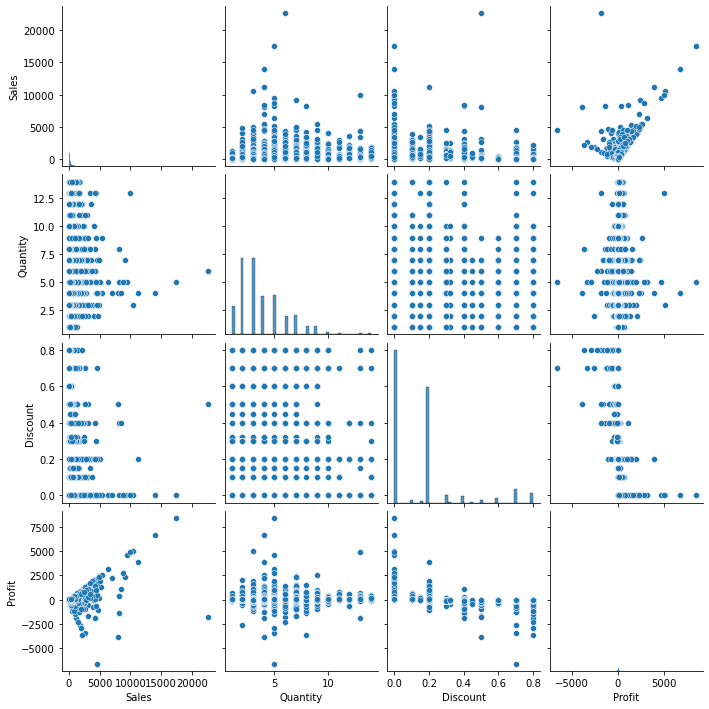

In [15]:
sns.pairplot(df)

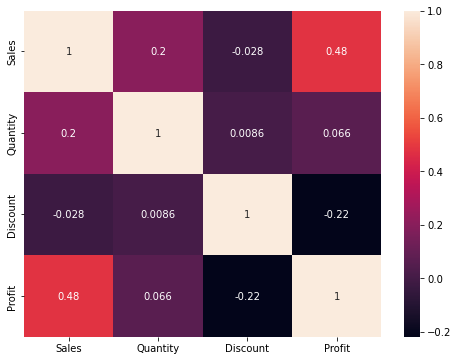

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Profit and Sales Based on  shipments


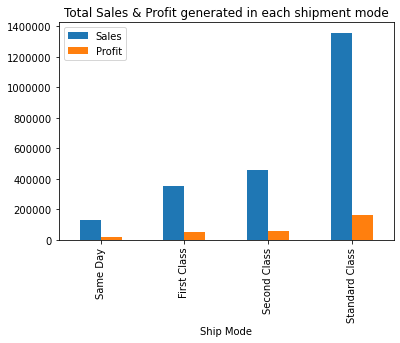

In [17]:

df.groupby(['Ship Mode'])[['Sales', 'Profit']].sum().sort_values('Profit').plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Sales & Profit generated in each shipment mode')
plt.show()

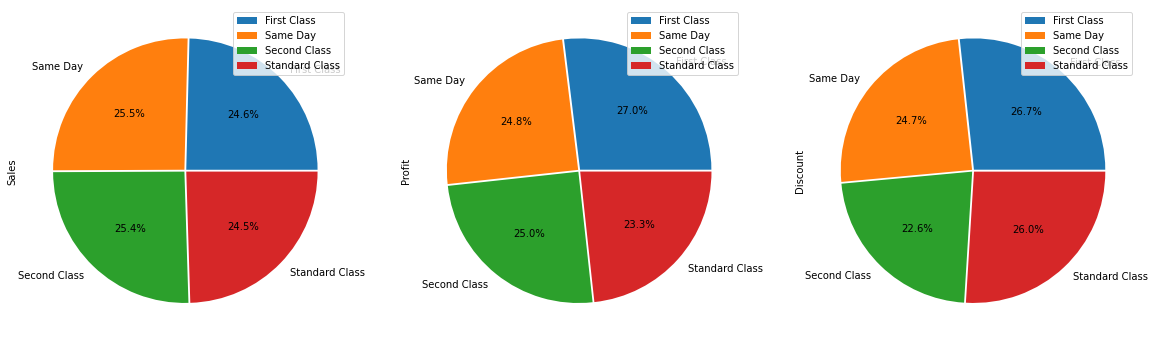

In [18]:
df.groupby(['Ship Mode'])[['Sales', 'Profit','Discount']].mean().plot.pie(subplots=True, figsize=(20,10), labels=df.groupby(['Ship Mode'])[['Sales', 'Profit']].mean().index, autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01))
plt.show()

## Profit analysis based on Shipment mode

####   1) Lowest sales: Standard Class(24.5%)
####   2) Highest sales: Same Day(25.5%) 
####   3) Lowest profit: Standard Class(23.3%) 
####   4) Highest profit: First class(27.0%)

## Profit Based on region

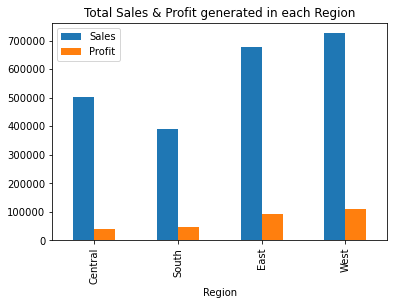

In [27]:
df.groupby(['Region'])[['Sales', 'Profit']].sum().sort_values('Profit').plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Sales & Profit generated in each Region')
plt.show()

In [28]:
df.groupby(['Region'])[['Sales', 'Profit','Discount']].mean()

,Sales,Profit,Discount
Region,,,
Central,215.772661,17.092709,0.240353
East,238.336110,32.135808,0.145365
South,241.803645,28.857673,0.147253
West,226.493233,33.849032,0.109335


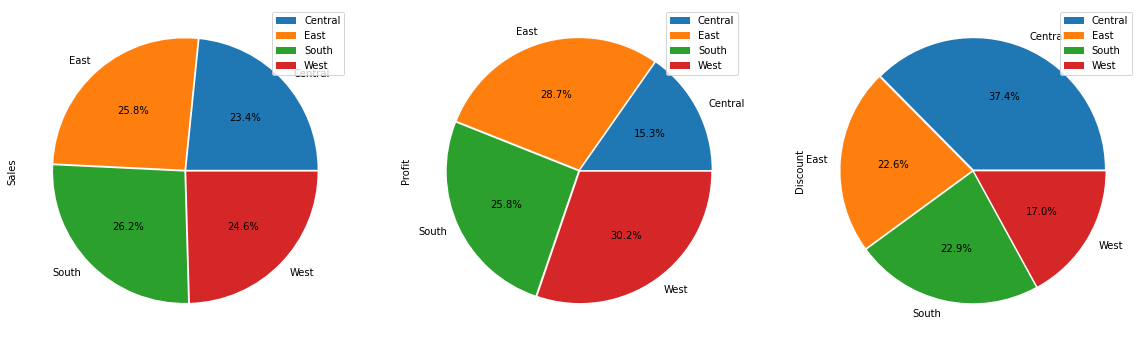

In [29]:
df.groupby(['Region'])[['Sales', 'Profit','Discount']].mean().plot.pie(subplots=True, figsize=(20,10), labels=df.groupby(['Region'])[['Sales', 'Profit']].mean().index, autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01))
plt.show()

## Profit analysis based on region

#### Lowest sales: Central(23.4%)

#### Highest sales: South(26.2%)

#### Lowest profit: Central(15.3%)

#### Highest profit: West(30.2%)

## Profit Based on each City

In [21]:
px.bar(df.groupby('City').mean().reset_index().sort_values('Profit',ascending=False).head(50),x='City',y='Profit',color='Discount',hover_data=df.groupby('City').mean().reset_index().columns,
      title='Top 50 Cities with highest number of profits')

In [22]:
px.bar(df.groupby('City').mean().reset_index().sort_values('Profit',ascending=False).tail(50),x='City',y='Profit',color='Discount',hover_data=df.groupby('City').mean().reset_index().columns,
      title='Top 50 Cities with Lowest number of profits')

## Profit and Sales Based on States

In [31]:
px.bar(df.groupby('State').mean().reset_index().sort_values('Sales',ascending=False),x='State',y='Profit',color='Discount',hover_data=df.groupby('State').mean().reset_index().columns,
      title='Sales & Profit genreted in each State')

## Profit analysis based on States
#### Lowest profit: Ohio
#### Highest profit: Vermont

### By looking at this situation the company needs to stop giving discounts in the states or cities where they are strugling to genrate profits or they need to discontinue the operations in those States and cities